# Vaccination Prediction
## PRCP-1014-VaccinePred
#### The goal is to predict how likely individuals are to receive their H1N1 and seasonal flu vaccines. In specific, the target is to predict two probabilities: one for h1n1_vaccine and one for seasonal_vaccine. It is a multi-label classification problem.

## Importing the required libraries

In [491]:
# Common libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Feature Selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA

# Libraries for Problem Transformation

from skmultilearn.problem_transform import BinaryRelevance
from skmultilearn.problem_transform import ClassifierChain
from skmultilearn.problem_transform import LabelPowerset

# Libraries for model training

from sklearn.preprocessing import MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split , GridSearchCV , cross_val_score

# Libraries for algorithm

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# Libraries for testing

from sklearn.metrics import accuracy_score , classification_report

# Removing warnings

import warnings
warnings.filterwarnings('ignore')

# Storing plots

%matplotlib inline

## Loading the dataset into the dataframe

In [492]:
df1 = pd.read_csv('C:/Users/jayap/Downloads/H1N1_vaccine_prediction/training_set_features.csv', delimiter=',')
features = df1.iloc[:,:]
df2 = pd.read_csv('C:/Users/jayap/Downloads/H1N1_vaccine_prediction/training_set_labels.csv', delimiter=',')
labels = df2.iloc[:,:]

In [493]:
features.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [494]:
labels.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


## Checking the shape of dataset

In [495]:
features.shape

(26707, 36)

#### There are 36 features so either we should do PCA or feature selection.

In [496]:
labels.shape

(26707, 3)

## Checking the data types

In [497]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

#### We need to encode the object to int

In [498]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


# DATA PRE-PROCESSING

# Checking for duplicates in dataset

In [499]:
features.duplicated().sum()

0

#### There no duplicates in dataset.

In [500]:
labels.duplicated().sum()

0

## Checking for missing values in dataset

In [501]:
features.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

#### There are lots of missing value so we need to impute them.

In [502]:
labels.isnull().sum()

respondent_id       0
h1n1_vaccine        0
seasonal_vaccine    0
dtype: int64

## Filling the missing values

In [503]:
numeric_features = features.select_dtypes(include=['int64', 'float64'])
numeric_features = numeric_features.fillna(numeric_features.mean())
numeric_features = numeric_features.round()
features.update(numeric_features)
features = features.fillna('No Category')

In [504]:
features.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

## Finding the unique values of features

In [505]:
# For Datatype = float

print("h1n1_concern")
print(features.h1n1_concern.unique())

print("h1n1_knowledge")
print(features.h1n1_knowledge.unique())

print("behavioral_antiviral_meds")
print(features.behavioral_antiviral_meds.unique())

print("behavioral_avoidance")
print(features.behavioral_avoidance.unique())

print("behavioral_face_mask")
print(features.behavioral_face_mask.unique())

print("behavioral_wash_hands")
print(features.behavioral_wash_hands.unique())

print("behavioral_large_gatherings")
print(features.behavioral_large_gatherings.unique())

print("behavioral_outside_home")
print(features.behavioral_outside_home.unique())

print("behavioral_touch_face")
print(features.behavioral_touch_face.unique())

print("doctor_recc_h1n1")
print(features.doctor_recc_h1n1.unique())

print("doctor_recc_seasonal")
print(features.doctor_recc_seasonal.unique())

print("chronic_med_condition")
print(features.chronic_med_condition.unique())

print("child_under_6_months")
print(features.child_under_6_months.unique())

print("health_worker")
print(features.health_worker.unique())

print("health_insurance")
print(features.health_insurance.unique())

print("opinion_h1n1_vacc_effective")
print(features.opinion_h1n1_vacc_effective.unique())

print("opinion_h1n1_risk")
print(features.opinion_h1n1_risk.unique())

print("opinion_h1n1_sick_from_vacc")
print(features.opinion_h1n1_sick_from_vacc.unique())

print("opinion_seas_vacc_effective")
print(features.opinion_seas_vacc_effective.unique())

print("opinion_seas_risk")
print(features.opinion_seas_risk.unique())

print("opinion_seas_sick_from_vacc")
print(features.opinion_seas_sick_from_vacc.unique())

h1n1_concern
[1. 3. 2. 0.]
h1n1_knowledge
[0. 2. 1.]
behavioral_antiviral_meds
[0. 1.]
behavioral_avoidance
[0. 1.]
behavioral_face_mask
[0. 1.]
behavioral_wash_hands
[0. 1.]
behavioral_large_gatherings
[0. 1.]
behavioral_outside_home
[1. 0.]
behavioral_touch_face
[1. 0.]
doctor_recc_h1n1
[0. 1.]
doctor_recc_seasonal
[0. 1.]
chronic_med_condition
[0. 1.]
child_under_6_months
[0. 1.]
health_worker
[0. 1.]
health_insurance
[1. 0.]
opinion_h1n1_vacc_effective
[3. 5. 4. 2. 1.]
opinion_h1n1_risk
[1. 4. 3. 2. 5.]
opinion_h1n1_sick_from_vacc
[2. 4. 1. 5. 3.]
opinion_seas_vacc_effective
[2. 4. 5. 3. 1.]
opinion_seas_risk
[1. 2. 4. 3. 5.]
opinion_seas_sick_from_vacc
[2. 4. 1. 5. 3.]


In [506]:
# For Datatype = object

print("age_group")
print(features.age_group.unique())

print("education")
print(features.education.unique())

print("race")
print(features.race.unique())

print("income_poverty")
print(features.income_poverty.unique())

print("marital_status")
print(features.marital_status.unique())

print("rent_or_own")
print(features.rent_or_own.unique())

print("employment_status")
print(features.employment_status.unique())

print("hhs_geo_region")
print(features.hhs_geo_region.unique())

print("census_msa")
print(features.census_msa.unique())

print("employment_industry")
print(features.employment_industry.unique())

print("employment_occupation")
print(features.employment_occupation.unique())

age_group
['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
education
['< 12 Years' '12 Years' 'College Graduate' 'Some College' 'No Category']
race
['White' 'Black' 'Other or Multiple' 'Hispanic']
income_poverty
['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' 'No Category']
marital_status
['Not Married' 'Married' 'No Category']
rent_or_own
['Own' 'Rent' 'No Category']
employment_status
['Not in Labor Force' 'Employed' 'Unemployed' 'No Category']
hhs_geo_region
['oxchjgsf' 'bhuqouqj' 'qufhixun' 'lrircsnp' 'atmpeygn' 'lzgpxyit'
 'fpwskwrf' 'mlyzmhmf' 'dqpwygqj' 'kbazzjca']
census_msa
['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']
employment_industry
['No Category' 'pxcmvdjn' 'rucpziij' 'wxleyezf' 'saaquncn' 'xicduogh'
 'ldnlellj' 'wlfvacwt' 'nduyfdeo' 'fcxhlnwr' 'vjjrobsf' 'arjwrbjb'
 'atmlpfrs' 'msuufmds' 'xqicxuve' 'phxvnwax' 'dotnnunm' 'mfikgejo'
 'cfqqtusy' 'mcubkhph' 'haxffmxo' 'qnlwzans']
employment_occupation
['No Category' 'xgw

## Encoding the object

In [507]:
enc = LabelEncoder()

In [508]:
features.age_group = enc.fit_transform(features.age_group)
features.education = enc.fit_transform(features.education)
features.race = enc.fit_transform(features.race)
features.sex = enc.fit_transform(features.sex)
features.income_poverty = enc.fit_transform(features.income_poverty)
features.marital_status = enc.fit_transform(features.marital_status)
features.rent_or_own = enc.fit_transform(features.rent_or_own)
features.employment_status = enc.fit_transform(features.employment_status)
features.hhs_geo_region = enc.fit_transform(features.hhs_geo_region)
features.census_msa = enc.fit_transform(features.census_msa)
features.employment_industry = enc.fit_transform(features.employment_industry)
features.employment_occupation = enc.fit_transform(features.employment_occupation)

In [509]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26707 non-null  float64
 2   h1n1_knowledge               26707 non-null  float64
 3   behavioral_antiviral_meds    26707 non-null  float64
 4   behavioral_avoidance         26707 non-null  float64
 5   behavioral_face_mask         26707 non-null  float64
 6   behavioral_wash_hands        26707 non-null  float64
 7   behavioral_large_gatherings  26707 non-null  float64
 8   behavioral_outside_home      26707 non-null  float64
 9   behavioral_touch_face        26707 non-null  float64
 10  doctor_recc_h1n1             26707 non-null  float64
 11  doctor_recc_seasonal         26707 non-null  float64
 12  chronic_med_condition        26707 non-null  float64
 13  child_under_6_mo

## Checking the dataset

In [510]:
features.head(10)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,2,2,1,2,8,2,0.0,0.0,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,2,2,2,0,1,0,0.0,0.0,13,20
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,2,1,0,9,0,2.0,0.0,15,22
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,2,2,2,2,5,1,0.0,0.0,0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,1,0,9,0,1.0,0.0,19,6
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,0,1,0,0,1,2.0,3.0,16,19
6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,2,1,0,9,0,0.0,0.0,20,22
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,0,1,0,1,2,2.0,0.0,13,21
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1,0,1,0,1,0,1.0,0.0,20,2
9,9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0,2,1,2,9,0,0.0,0.0,0,0


# EXPLORATORY DATA ANALYSIS

## Checking the statistical information

In [511]:
features.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
count,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,...,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000,26707.000000
mean,13353.000000,1.619800,1.261392,0.048714,0.727749,0.068933,0.825888,0.357472,0.336279,0.678811,...,0.953795,0.932190,1.145542,0.984161,4.829745,0.833489,0.887558,0.538922,5.290710,6.242371
std,7709.791156,0.909016,0.617047,0.215273,0.445127,0.253345,0.379213,0.479264,0.472444,0.466942,...,1.113444,0.970936,0.526582,1.052723,2.805984,0.823313,0.749980,0.924918,7.079824,7.957241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,1.000000,2.000000,7.000000,2.000000,1.000000,1.000000,9.000000,11.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,2.000000,2.000000,3.000000,9.000000,2.000000,3.000000,3.000000,21.000000,23.000000


## Finding the outliers in dataset

In [512]:
# Function to find the outliers

def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)
            
    return np.array(outliers)  

In [513]:
print(len(findoutliers(features.household_adults)))
print(len(findoutliers(features.household_children)))

1125
1747


In [514]:
findoutliers(features.household_adults)

array([3., 3., 3., ..., 3., 3., 3.])

In [515]:
findoutliers(features.household_children)

array([3., 3., 3., ..., 3., 3., 3.])

<Axes: >

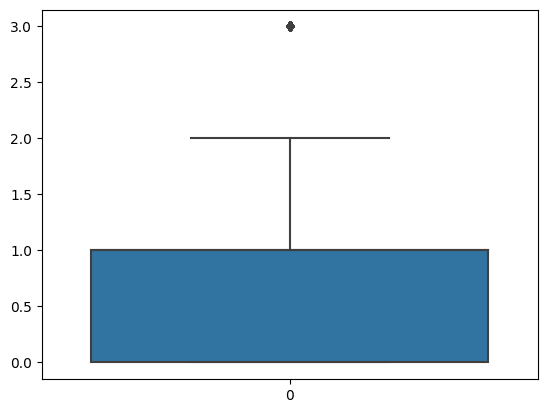

In [516]:
# Visualising the outliers
sns.boxplot(features.household_adults)

<Axes: >

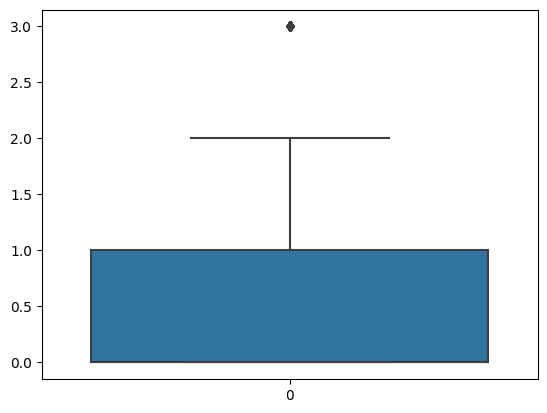

In [517]:
sns.boxplot(features.household_children)

#### There are outliers in the dataset but we are not removing them as some algorithms are not sensitive to outliers

# Visualising numerical data

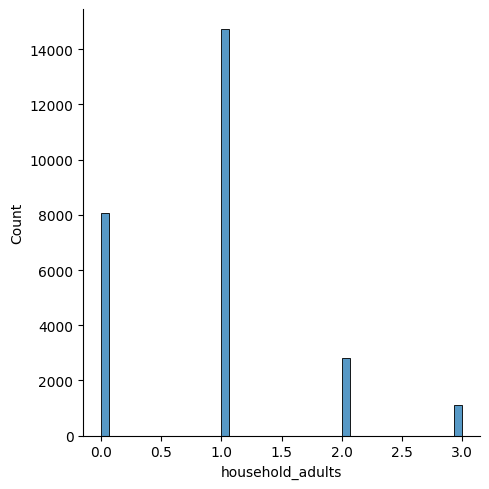

In [518]:
sns.displot(features.household_adults)

#### Number of other adults in household is mostly 1.

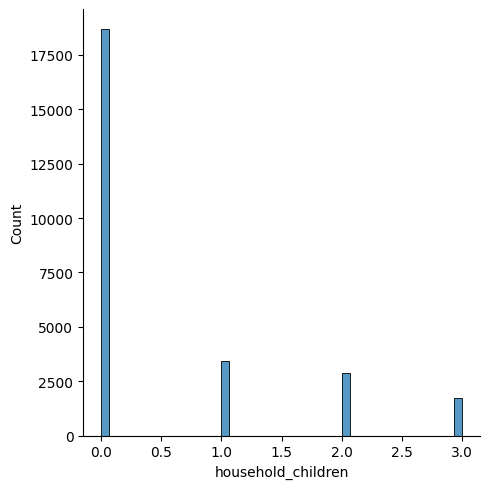

In [519]:
sns.displot(features.household_children)

#### Number of children in household is mostly 0.

## Visualising categorical data

In [520]:
features.h1n1_concern.value_counts()

h1n1_concern
2.0    10667
1.0     8153
3.0     4591
0.0     3296
Name: count, dtype: int64

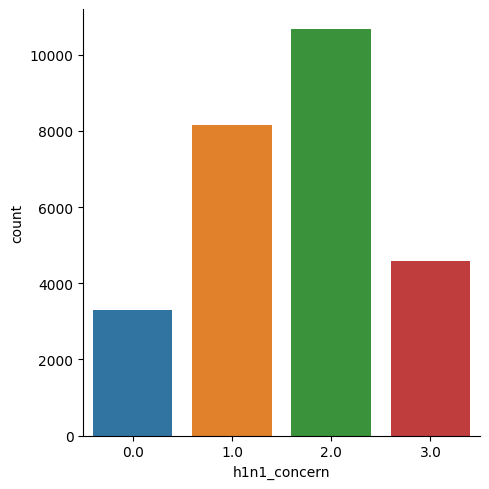

In [521]:
sns.catplot(x = 'h1n1_concern', data = features, kind = "count")

#### Most of the people are somewhat concerned about h1n1 vaccine.

In [522]:
features.h1n1_knowledge.value_counts()

h1n1_knowledge
1.0    14714
2.0     9487
0.0     2506
Name: count, dtype: int64

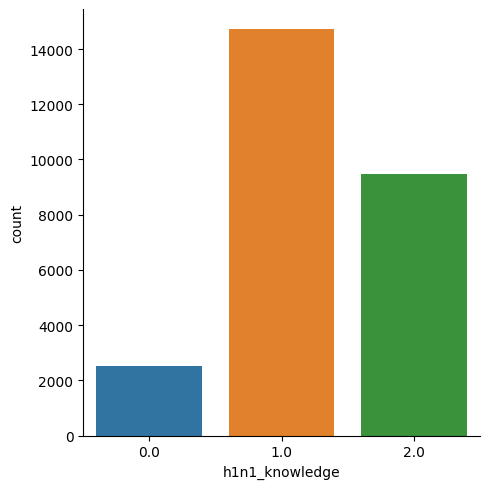

In [523]:
sns.catplot(x = 'h1n1_knowledge', data = features, kind = "count")

#### Almost 90% of people have little or lots of knowledge about h1n1 vaccine.

In [524]:
features.behavioral_antiviral_meds.value_counts()

behavioral_antiviral_meds
0.0    25406
1.0     1301
Name: count, dtype: int64

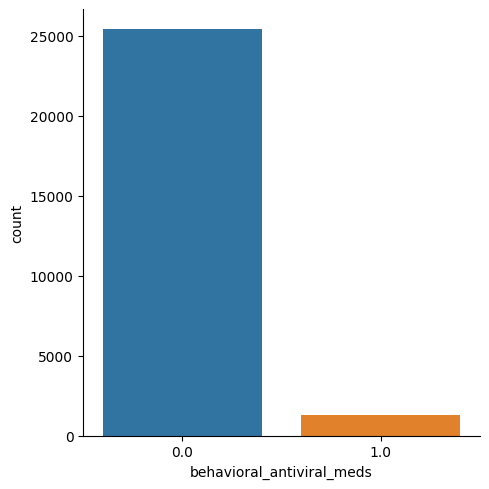

In [525]:
sns.catplot(x = 'behavioral_antiviral_meds', data = features, kind = "count")

#### Almost non of the people took antiviral medications.

In [526]:
features.behavioral_avoidance.value_counts()

behavioral_avoidance
1.0    19436
0.0     7271
Name: count, dtype: int64

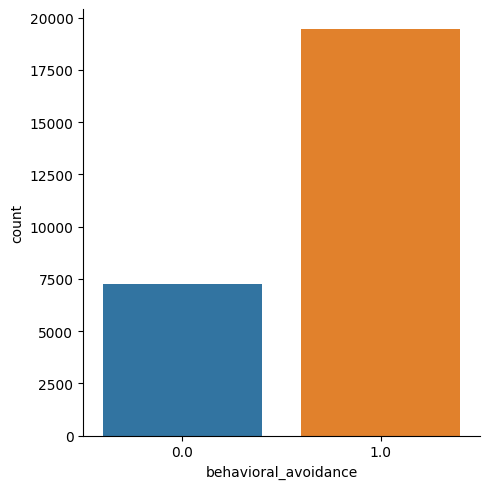

In [527]:
sns.catplot(x = 'behavioral_avoidance', data = features, kind = "count")

#### 70% of people have avoided contact with people with symptoms.

In [528]:
features.behavioral_face_mask.value_counts()

behavioral_face_mask
0.0    24866
1.0     1841
Name: count, dtype: int64

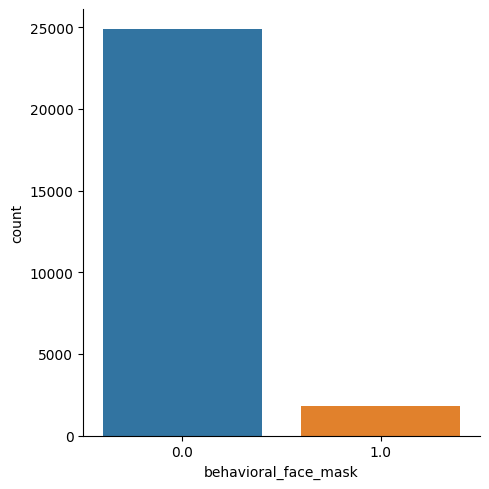

In [529]:
sns.catplot(x = 'behavioral_face_mask', data = features, kind = "count")

#### Very few people have bought a face mask.

In [530]:
features.behavioral_wash_hands.value_counts()

behavioral_wash_hands
1.0    22057
0.0     4650
Name: count, dtype: int64

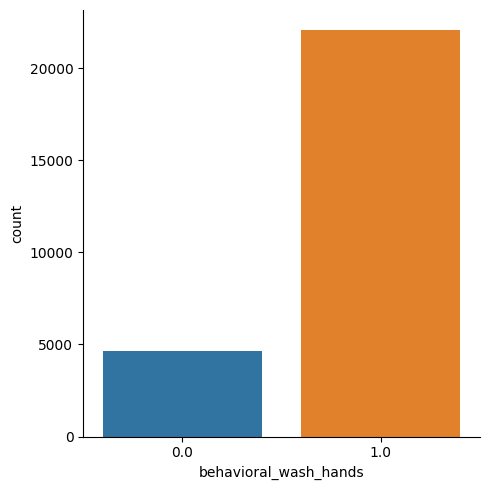

In [531]:
sns.catplot(x = 'behavioral_wash_hands', data = features, kind = "count")

#### 80% of people have frequently washed their hands.

In [532]:
features.behavioral_large_gatherings.value_counts()

behavioral_large_gatherings
0.0    17160
1.0     9547
Name: count, dtype: int64

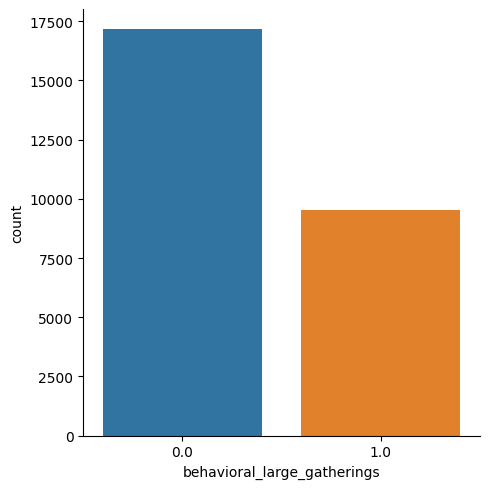

In [533]:
sns.catplot(x = 'behavioral_large_gatherings', data = features, kind = "count")

#### Few people have reduced time at large gatherings.

In [534]:
features.behavioral_outside_home.value_counts()

behavioral_outside_home
0.0    17726
1.0     8981
Name: count, dtype: int64

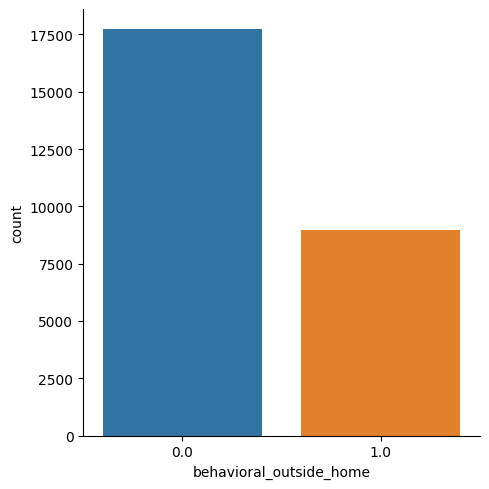

In [535]:
sns.catplot(x = 'behavioral_outside_home', data = features, kind = "count")

#### Only few people have reduced contact with people outside their household.

In [536]:
features.behavioral_touch_face.value_counts()

behavioral_touch_face
1.0    18129
0.0     8578
Name: count, dtype: int64

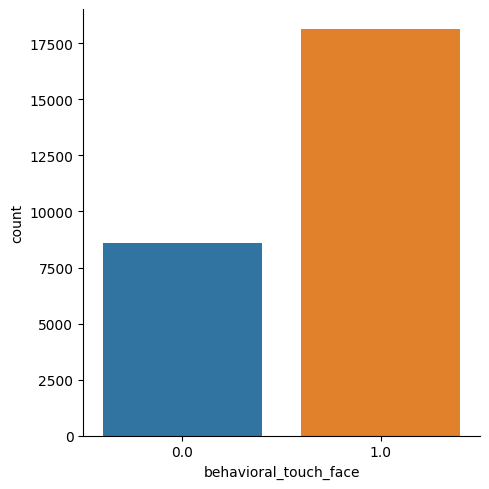

In [537]:
sns.catplot(x = 'behavioral_touch_face', data = features, kind = "count")

#### 70% of people have avoided touching eyes, nose, or mouth.

In [538]:
features.doctor_recc_h1n1.value_counts()

doctor_recc_h1n1
0.0    21299
1.0     5408
Name: count, dtype: int64

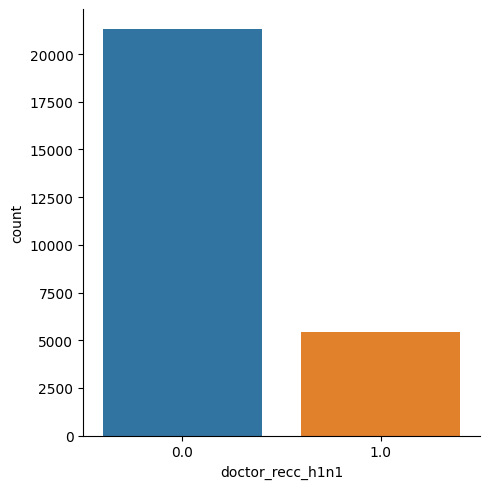

In [539]:
sns.catplot(x = 'doctor_recc_h1n1', data = features, kind = "count")

#### Doctors recommended the h1n1 vaccine to only 20% of people.

In [540]:
features.doctor_recc_seasonal.value_counts()

doctor_recc_seasonal
0.0    18613
1.0     8094
Name: count, dtype: int64

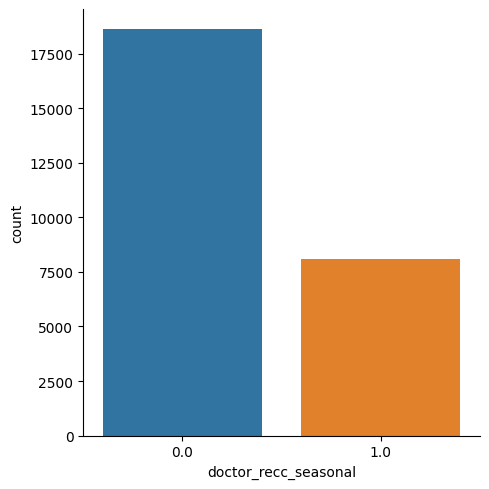

In [541]:
sns.catplot(x = 'doctor_recc_seasonal', data = features, kind = "count")

#### Doctors recommended seasonal vaccine to only 30% of people.

In [542]:
features.chronic_med_condition .value_counts()

chronic_med_condition
0.0    19417
1.0     7290
Name: count, dtype: int64

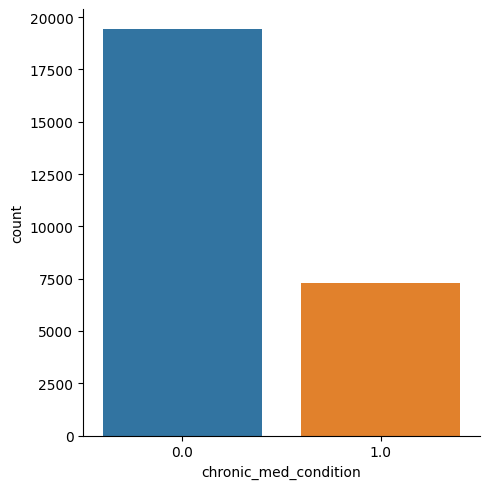

In [543]:
sns.catplot(x = 'chronic_med_condition', data = features, kind = "count")

#### Only less than 30% of people have chronic medical conditions.

In [544]:
features.child_under_6_months.value_counts()

child_under_6_months
0.0    24569
1.0     2138
Name: count, dtype: int64

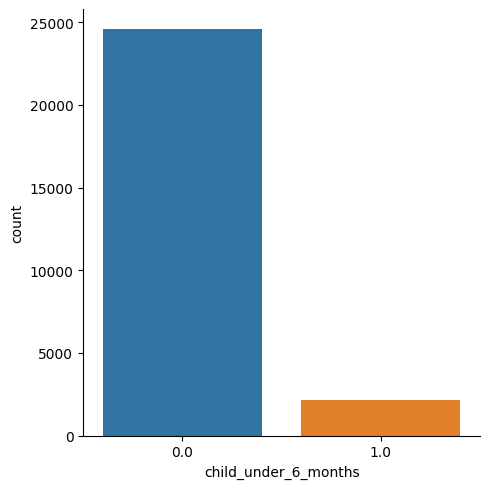

In [545]:
sns.catplot(x = 'child_under_6_months', data = features, kind = "count")

#### Very few people had close contact with child under 6 months.

In [546]:
features.health_worker.value_counts()

health_worker
0.0    23808
1.0     2899
Name: count, dtype: int64

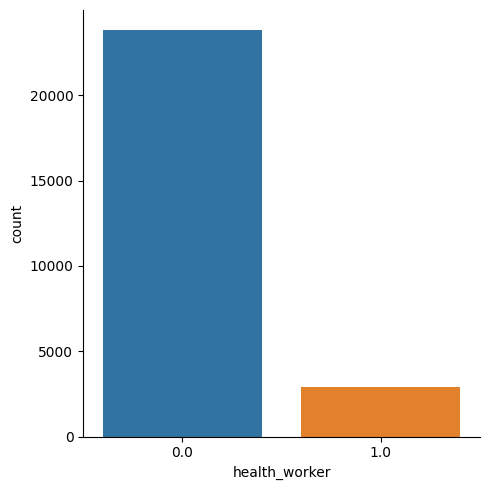

In [547]:
sns.catplot(x = 'health_worker', data = features, kind = "count")

#### Very few people work in healthcare.

In [548]:
features.health_insurance.value_counts()

health_insurance
1.0    24971
0.0     1736
Name: count, dtype: int64

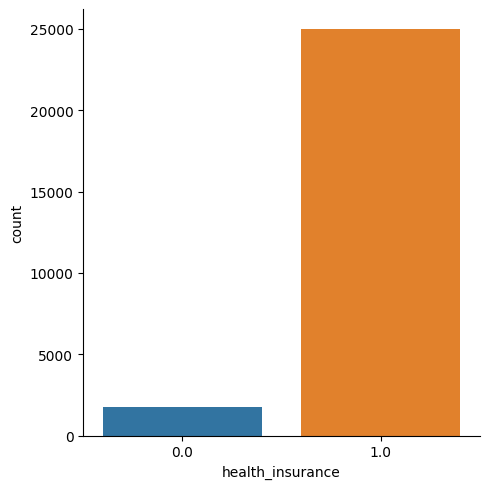

In [549]:
sns.catplot(x = 'health_insurance', data = features, kind = "count")

#### Almost everyone has health insurance.

In [550]:
features.opinion_h1n1_vacc_effective.value_counts()

opinion_h1n1_vacc_effective
4.0    12074
5.0     7166
3.0     4723
2.0     1858
1.0      886
Name: count, dtype: int64

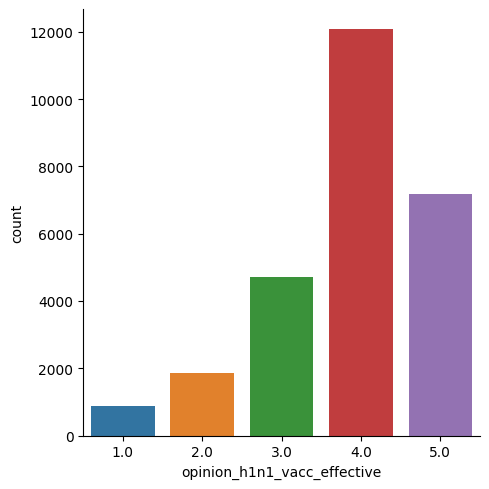

In [551]:
sns.catplot(x = 'opinion_h1n1_vacc_effective', data = features, kind = "count")

#### Most of the people think h1n1 is somewhat effective.

In [552]:
features.opinion_h1n1_risk.value_counts()

opinion_h1n1_risk
2.0    10307
1.0     8139
4.0     5394
5.0     1750
3.0     1117
Name: count, dtype: int64

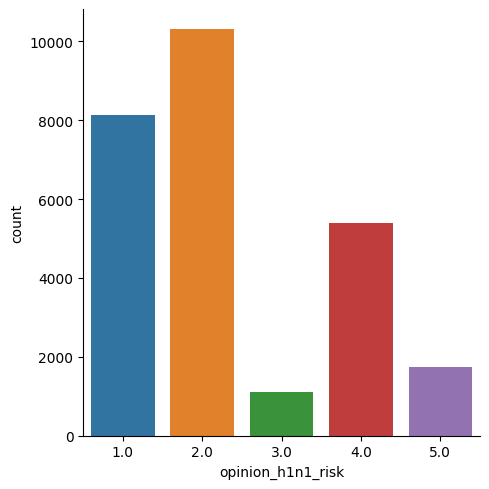

In [553]:
sns.catplot(x = 'opinion_h1n1_risk', data = features, kind = "count")

#### Most people believe the h1n1 vaccine has somewhat low or very low risk.

In [554]:
features.opinion_h1n1_sick_from_vacc.value_counts()

opinion_h1n1_sick_from_vacc
2.0    9524
1.0    8998
4.0    5850
5.0    2187
3.0     148
Name: count, dtype: int64

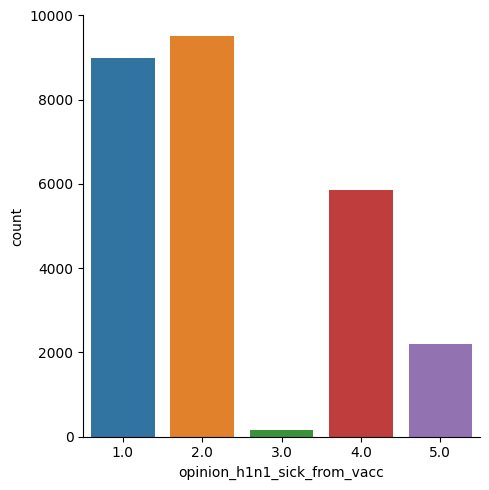

In [555]:
sns.catplot(x = 'opinion_h1n1_sick_from_vacc', data = features, kind = "count")

#### Most people are not at all worried or not very worried of getting sick from h1n1 vaccine.

In [556]:
features.opinion_seas_vacc_effective.value_counts()

opinion_seas_vacc_effective
4.0    12091
5.0     9973
2.0     2206
1.0     1221
3.0     1216
Name: count, dtype: int64

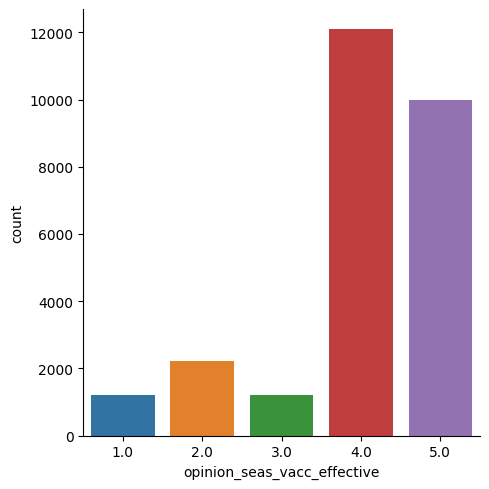

In [557]:
sns.catplot(x = 'opinion_seas_vacc_effective', data = features, kind = "count")

#### Most people think seasonal vaccine is somewhat or very effective.

In [558]:
features.opinion_seas_risk.value_counts()

opinion_seas_risk
2.0    8954
4.0    7630
1.0    5974
5.0    2958
3.0    1191
Name: count, dtype: int64

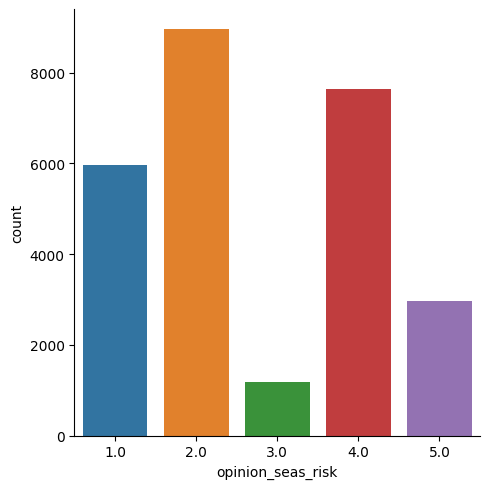

In [559]:
sns.catplot(x = 'opinion_seas_risk', data = features, kind = "count")

#### Majority of people think the riske of seasonal vaccine are somewhat low.

In [560]:
features.opinion_seas_sick_from_vacc.value_counts()

opinion_seas_sick_from_vacc
1.0    11870
2.0     8170
4.0     4852
5.0     1721
3.0       94
Name: count, dtype: int64

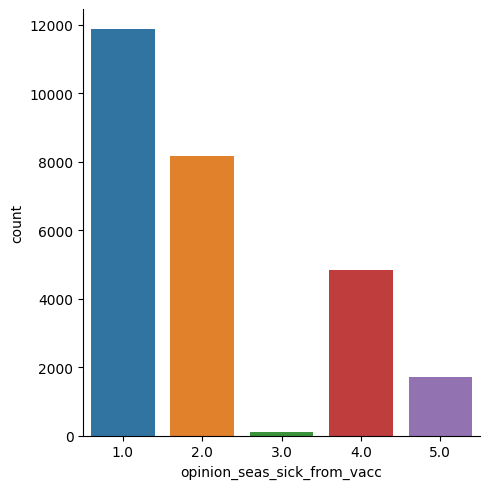

In [561]:
sns.catplot(x = 'opinion_seas_sick_from_vacc', data = features, kind = "count")

#### Majority of people are not at all worried of getting sick from seasonal vaccine.

## Visualising labels

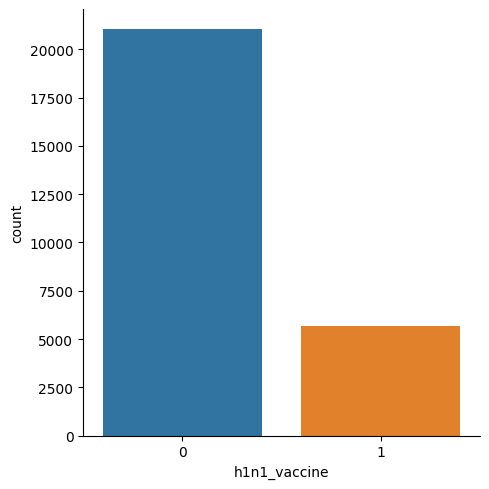

In [562]:
sns.catplot(x = 'h1n1_vaccine', data = labels, kind = "count")

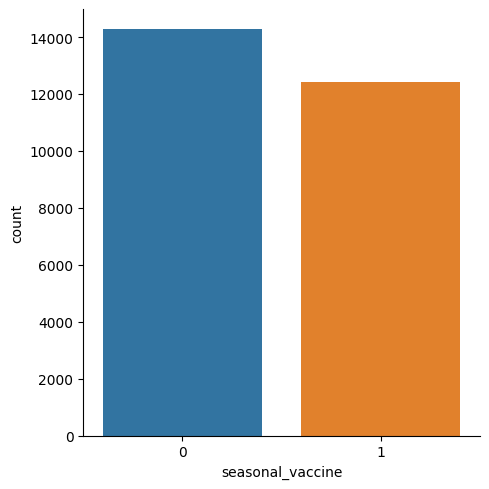

In [563]:
sns.catplot(x = 'seasonal_vaccine', data = labels, kind = "count")

# FEATURE SCALING

## Using Min Max scaler

In [564]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)
labels = scaler.fit_transform(labels)

In [565]:
features = pd.DataFrame(features)
col_name = ['respondent_id','h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation']
features.columns = col_name

In [566]:
labels = pd.DataFrame(labels)
col_name = ['respondent_id','h1n1_vaccine', 'seasonal_vaccine']
labels.columns = col_name

# FEATURE SELECTION

## Independent and target variables

In [567]:
X = features
y = labels

## Applying SelectKBest class

In [572]:
bestfeatures = SelectKBest(score_func=chi2, k=30)

In [573]:
fit = bestfeatures.fit(X,y)

ValueError: Multioutput target data is not supported with label binarization

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

print(featureScores.nlargest(25,'Score'))

In [ ]:
features_kbest = features.iloc[:,[9,10,19,16,13,11,21,18,15,34,0,33,32,8,12,1,24,5,26,17,6,3,7,2,4]]

## Feature importance using ExtraTrees Classifier

In [ ]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
plt.figure(figsize=(10,10))
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [ ]:
features_tree = features.loc[:,['opinion_seas_risk','doctor_recc_seasonal','opinion_seas_vacc_effective',
                                 'doctor_recc_h1n1','age_group','opinion_h1n1_risk','hhs_geo_region',
                                 'opinion_h1n1_vacc_effective','h1n1_concern','opinion_seas_sick_from_vacc',
                                 'opinion_h1n1_sick_from_vacc','census_msa','education','income_poverty',
                                 'h1n1_knowledge','household_adults','employment_occupation',
                                 'employment_industry','household_children','sex','race','marital_status',
                                 'rent_or_own','behavioral_outside_home','behavioral_large_gatherings']]

## Correlation Matrix using Heatmap

In [ ]:
features.corrwith(labels.h1n1_vaccine)

In [ ]:
features.corrwith(labels.seasonal_vaccine)

In [ ]:
#get correlations of each features in dataset
corrmat = features.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(features[top_corr_features].corr(),annot=True,cmap="Blues")

In [ ]:
features.drop(['opinion_seas_sick_from_vacc','hhs_geo_region','census_msa',
               'household_adults','household_children','behavioral_antiviral_meds',
               'education'], axis = 1, inplace = True)

# MODEL

## Defining independent and dependent variables

In [ ]:
X = features
y = labels

In [ ]:
X

In [ ]:
y

## Splitting the data into training and testing data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=23)

## Using Binary Relevance - Naive Bayes

In [ ]:
# Gaussian Naive Bayes

# Initializing

model_BR_GNB = BinaryRelevance(GaussianNB())

# Training

model_BR_GNB.fit(x_train,y_train)

# Predicting

y_pred_BR_GNB = model_BR_GNB.predict(x_test)

# Testing

BR_GNB = accuracy_score(y_test,y_pred_BR_GNB)
BR_GNB

## Using Binary Relevance - Decision Tree

In [ ]:
# Initializing

model_BR_DT = BinaryRelevance(DecisionTreeClassifier())

# Training

model_BR_DT.fit(x_train,y_train)

# Predicting

y_pred_BR_DT = model_BR_DT.predict(x_test)

# Testing

BR_DT = accuracy_score(y_test,y_pred_BR_DT)
BR_DT

## Using Binary Relevance - Logistic Regression

In [ ]:
# Initializing

model_BR_LR = BinaryRelevance(LogisticRegression())

# Training

model_BR_LR.fit(x_train,y_train)

# Predicting

y_pred_BR_LR = model_BR_LR.predict(x_test)

# Testing

BR_LR = accuracy_score(y_test,y_pred_BR_LR)
BR_LR

## Using Classifier Chains - Naive Bayes

In [ ]:
# Gaussian Naive Bayes

# Initializing

model_CC_GNB = ClassifierChain(GaussianNB())

# Training

model_CC_GNB.fit(x_train,y_train)

# Predicting

y_pred_CC_GNB = model_CC_GNB.predict(x_test)

# Testing

CC_GNB = accuracy_score(y_test,y_pred_CC_GNB)
CC_GNB

## Using Classifier Chains - Decision Tree

In [ ]:
# Initializing

model_CC_DT = ClassifierChain(DecisionTreeClassifier())

# Training

model_CC_DT.fit(x_train,y_train)

# Predicting

y_pred_CC_DT = model_CC_DT.predict(x_test)

# Testing

CC_DT = accuracy_score(y_test,y_pred_CC_DT)
CC_DT

## Using Classifier Chains - Logistic Regression

In [ ]:
# Initializing

model_CC_LR = ClassifierChain(LogisticRegression())

# Training

model_CC_LR.fit(x_train,y_train)

# Predicting

y_pred_CC_LR = model_CC_LR.predict(x_test)

# Testing

CC_LR = accuracy_score(y_test,y_pred_CC_LR)
CC_LR

## Using Label Powerset - Naive Bayes

In [ ]:
# Gaussian Naive Bayes

# Initializing

model_LP_GNB = LabelPowerset(GaussianNB())

# Training

model_LP_GNB.fit(x_train,y_train)

# Predicting

y_pred_LP_GNB = model_LP_GNB.predict(x_test)

# Testing

LP_GNB = accuracy_score(y_test,y_pred_LP_GNB)
LP_GNB

## Using Label Powerset - Decision Tree

In [ ]:
# Initializing

model_LP_DT = LabelPowerset(DecisionTreeClassifier())

# Training

model_LP_DT.fit(x_train,y_train)

# Predicting

y_pred_LP_DT = model_LP_DT.predict(x_test)

# Testing

LP_DT = accuracy_score(y_test,y_pred_LP_DT)
LP_DT

## Random Forest

In [ ]:
# Initializing

model_RF = RandomForestClassifier()

# Training

model_RF.fit(x_train,y_train)

# Predicting

y_pred_RF = model_RF.predict(x_test)

# Testing
RF = accuracy_score(y_test,y_pred_RF)
RF

# MODEL EVALUATION

## Accuracy score comparison chart

In [ ]:
Accuracy_Score = [BR_GNB,BR_DT,BR_LR,CC_GNB,CC_DT,CC_LR,LP_GNB,LP_DT,RF]
Models = ['BR Naive Bayes', 'BR Decision Tree' , 'BR Logistic Regression', 'CC Naive Bayes',
          'CC Decision Tree', 'CC Logistic Regression', 'LP Naive Bayes', 'LP Decision Tree','Random Forest']

In [ ]:
sns.barplot(Accuracy_Score, Models, color="m")
plt.xlabel('Accuracy Score')
plt.title('Accuracy Score')
plt.show()

#### RANDOM FOREST HAS THE HIGHEST ACCURACY SCORE